In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [4]:
!pip install SimpleITK

In [0]:
import os

In [0]:
import SimpleITK as sitk
import numpy as np

In [0]:


def model_gen(input_dim,x,y,slice_no):
  X1 = []
  X2 = []
  Y = []
  for i in range(int((input_dim)/2),y.shape[0]-int((input_dim)/2)):
    for j in range(int((input_dim)/2),y.shape[2]-int((input_dim)/2)):
      #Filtering all 0 patches
      if(x[i-16:i+17,j-16:j+17,:].any != 0):
        X2.append(x[i-16:i+17,j-16:j+17,:])
        X1.append(x[i-int((input_dim)/2):i+int((input_dim)/2),j-int((input_dim)/2):j+int((input_dim)/2),:])
        if(slice_no==101):
          print(y[i,slice_no,j])
        Y.append(y[i,slice_no,j])
      
  
#   X1 = np.asarray(X1)
#   X2 = np.asarray(X2)
#   Y = np.asarray(Y)
#   d = [X1,X2,Y]
#   return d

In [7]:
import keras
from keras import layers
from keras.layers import Input, Dense,concatenate, Activation,UpSampling2D, core, ZeroPadding2D, ZeroPadding1D, BatchNormalization, Flatten, Conv2D, Lambda,Concatenate
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D, Add
from keras.models import Model
from keras import regularizers
from keras.preprocessing import image
from keras.utils import to_categorical
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
from keras.initializers import glorot_normal
#import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

Using TensorFlow backend.


In [0]:

def data_gen(data,y,slice_no,model_no):
#   for i in range(data.shape[0]):
  
    d = []
    x = data[slice_no]
    
    #filtering all 0 slices and non-tumor slices
    if(x.any() != 0 and y.any() != 0):
  
      if(model_no == 1):
        d = model_gen(64,x,y,slice_no)
   

    return d

In [0]:
fold = os.listdir('/content/drive/My Drive/brat/data/')
fold.sort(key=str.lower) 

for path in fold:
  
    print(path)
    path = '/content/drive/My Drive/brat/data/'+path
    p = os.listdir(path)
    p.sort(key=str.lower)
    print(p)
    arr = []

    # Reading from 4 images and creating 4 channel slice-wise 
    for i in range(len(p)):
      if(i != 1):
       
        p1 = p[i]
#         p1.sort()
        print(p1)
        img = sitk.ReadImage(path+'/'+p[i])
        arr.append(sitk.GetArrayFromImage(img))
      else:
        
        p1 = p[i]
        print(p1)
        img = sitk.ReadImage(path+'/'+p[i])
        Y_labels = sitk.GetArrayFromImage(img)
#     print(Y_labels.shape[1])
#     print(Y_labels.shape[0])
#     print(Y_labels.shape[2])
#     print("jass")
    data = np.zeros((Y_labels.shape[0],Y_labels.shape[1],Y_labels.shape[2],4))
    for i in range(Y_labels.shape[0]):
      data[i,:,:,0] = arr[0][i,:,:]
      data[i,:,:,1] = arr[1][i,:,:]
      data[i,:,:,2] = arr[2][i,:,:]
      data[i,:,:,3] = arr[3][i,:,:]
    print(data.shape)

    info = []
    Creating patches for each slice and training
    for i in range(data.shape[0]):
      d = data_gen(data,Y_labels,i,1)
      if(len(d) != 0):
        y = np.zeros((d[2].shape[0],64,64,5))
        for j in range(y.shape[0]):
          y[j,32,32,d[2][j]] = 1
        X1 = d[0]
        X2 = d[1]
        class_weights = class_weight.compute_class_weight('balanced',
                                                          np.unique(d[2]),
                                                          d[2])
        print('slice no:'+str(i))
        info.append(m1.fit(X1,y,epochs=1,batch_size=20,class_weight= class_weights))

        m1.save('/content/drive/My Drive/brat/trial_1_unet_acc.h5')
    
    

0002
['Brats18_2013_2_1_flair.nii', 'Brats18_2013_2_1_seg.nii', 'Brats18_2013_2_1_t1.nii', 'Brats18_2013_2_1_t1ce.nii', 'Brats18_2013_2_1_t2.nii']
Brats18_2013_2_1_flair.nii
Brats18_2013_2_1_seg.nii
Brats18_2013_2_1_t1.nii
Brats18_2013_2_1_t1ce.nii
Brats18_2013_2_1_t2.nii
(155, 240, 240, 4)


In [0]:
model = keras.models.load_model('/content/drive/My Drive/brat/trial_0006_unet_acc.h5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


In [0]:
from sklearn import metrics

In [0]:
path = '/content/drive/My Drive/brat/HG/0027'
p = os.listdir(path)
p.sort(key=str.lower)
arr = []
for i in range(len(p)):
  if(i != 4):
    p1 = os.listdir(path+'/'+p[i])
    p1.sort()
    img = sitk.ReadImage(path+'/'+p[i]+'/'+p1[-1])
    arr.append(sitk.GetArrayFromImage(img))
    
  else:
    p1 = os.listdir(path+'/'+p[i])
    img = sitk.ReadImage(path+'/'+p[i]+'/'+p1[0])
    Y_labels = sitk.GetArrayFromImage(img)    
data = np.zeros((Y_labels.shape[1],Y_labels.shape[0],Y_labels.shape[2],4))
for i in range(Y_labels.shape[1]):
    data[i,:,:,0] = arr[0][:,i,:]
    data[i,:,:,1] = arr[1][:,i,:]
    data[i,:,:,2] = arr[2][:,i,:]
    data[i,:,:,3] = arr[3][:,i,:]
info = []
# for i in range(data.shape[0]):
#       d = data_gen(data,Y_labels,i,1)
#       if(len(d) != 0):
#           print(i)
d = data_gen(data,Y_labels,120,1)
if(len(d) != 0):
    y = np.zeros((d[2].shape[0],1,1,5))
    for j in range(y.shape[0]):
      y[j,:,:,d[2][j]] = 1
    X1 = d[0]
    X2 = d[1]
    pred = model.predict(X1,batch_size = 30) 
    pred = np.around(pred)
    #print(pred.shape)
    pred1 = np.argmax(pred.reshape(y.shape[0],5)[:,1:4],axis = 1)
    y2 = np.argmax(y.reshape(y.shape[0],5)[:,1:4],axis = 1)
    f1 = metrics.f1_score(y2,pred1,average='micro')
    print(f1)

(230, 162, 4)
0.9438160806491271


In [0]:
pred = model.predict(X1,batch_size = 30)


In [0]:
pred = np.around(pred)
print(pred.shape)
pred1 = np.argmax(pred.reshape(y.shape[0],5)[:,1:4],axis = 1)
y2 = np.argmax(y.reshape(y.shape[0],5)[:,1:4],axis = 1)

(16268, 1, 1, 5)


In [0]:
import cv2

In [0]:
pr = pred.reshape(( 98 ,  166 , 5 ) ).argmax( axis=2 )
seg_img = np.zeros( ( 98, 166 , 5  ) )
for c in range(5):
  seg_img[:,:,0] += ( (pr[:,: ] == c )*( colors[c][0] )).astype('uint8')
  seg_img[:,:,1] += ((pr[:,: ] == c )*( colors[c][1] )).astype('uint8')
  seg_img[:,:,2] += ((pr[:,: ] == c )*( colors[c][2] )).astype('uint8')
  seg_img[:,:,3] += ((pr[:,: ] == c )*( colors[c][3] )).astype('uint8')
  seg_img[:,:,4] += ((pr[:,: ] == c )*( colors[c][4] )).astype('uint8')
seg_img = cv2.resize(seg_img  , (230 , 162))
cv2.imwrite( "seg_out.png" , seg_img )

error: ignored

In [0]:
import random

In [0]:
colors = [  ( random.randint(0,255),random.randint(0,255),random.randint(0,255),random.randint(0,255),random.randint(0,255)   ) for _ in range(5)  ]

In [0]:
!pip install opencv-python 

In [0]:
def unet(pretrained_weights = None,input_size = (240,240,4)):
    inputs = Input(input_size)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
    print(conv1)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    print(pool1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    print(pool2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    print(pool3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    print(conv4)
    drop4 = Dropout(0.5)(conv4)
    print(drop4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    drop5 = Dropout(0.5)(conv5)
    print(drop5)
    up6 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))
    print(up6)
    merge6 = concatenate([drop4,up6], axis = 3)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)

    up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
    merge7 = concatenate([conv3,up7], axis = 3)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)

    up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
    merge8 = concatenate([conv2,up8], axis = 3)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)

    up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
    merge9 = concatenate([conv1,up9], axis = 3)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv9 = Conv2D(5, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv10 = core.Activation('sigmoid')(conv9)
#     Conv2D(activation = 'sigmoid')(conv9)

    model = Model(input = inputs, output = conv10)

    model.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy'])
    
    #model.summary()

#     if(pretrained_weights):
#     	model.load_weights(pretrained_weights)

    return model

In [9]:

m1 = unet()

m1.summary()

Instructions for updating:
Colocations handled automatically by placer.
Tensor("conv2d_1/Relu:0", shape=(?, 240, 240, 64), dtype=float32)
Tensor("max_pooling2d_1/MaxPool:0", shape=(?, 120, 120, 64), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 60, 60, 128), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 30, 30, 256), dtype=float32)
Tensor("conv2d_8/Relu:0", shape=(?, 30, 30, 512), dtype=float32)
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Tensor("dropout_1/cond/Merge:0", shape=(?, 30, 30, 512), dtype=float32)
Tensor("dropout_2/cond/Merge:0", shape=(?, 15, 15, 1024), dtype=float32)
Tensor("conv2d_11/Relu:0", shape=(?, 30, 30, 512), dtype=float32)
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 240, 240

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:52: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("ac...)`


In [0]:
from sklearn.utils import class_weight

In [0]:
from keras.callbacks import EarlyStopping

In [0]:
fold = os.listdir('/content/drive/My Drive/brat/HGGex/')
fold.sort(key=str.lower) 

for path in fold:
  
    print(path)
    path = '/content/drive/My Drive/brat/HGGex/'+path
    p = os.listdir(path)
    p.sort(key=str.lower)
    print(p)
    arr = []

    # Reading from 4 images and creating 4 channel slice-wise 
    for i in range(len(p)):
      if(i != 1):
       
        p1 = p[i]
#         p1.sort()
        img = sitk.ReadImage(path+'/'+p[i])
        arr.append(sitk.GetArrayFromImage(img))
      else:
        
        p1 = p[i]
        print(p1)
        img = sitk.ReadImage(path+'/'+p[i])
        Y_labels = sitk.GetArrayFromImage(img)
        print(Y_labels.shape)
#     print(Y_labels.shape[1])
#     print(Y_labels.shape[0])
#     print(Y_labels.shape[2])
#     print("jass")
    data = np.zeros((Y_labels.shape[0],Y_labels.shape[1],Y_labels.shape[2],4))
    for i in range(Y_labels.shape[0]):
      data[i,:,:,0] = arr[0][i,:,:]
      data[i,:,:,1] = arr[1][i,:,:]
      data[i,:,:,2] = arr[2][i,:,:]
      data[i,:,:,3] = arr[3][i,:,:]
    print(data.shape)
    
#     ytry = Y_labels[88]
#     for i in range(240):
#       print(ytry[i,:])
    Y_labels = Y_labels.reshape((Y_labels.shape[0],Y_labels.shape[1],Y_labels.shape[2],1))
    print(Y_labels.shape)
    y = Y_labels.reshape((-1))
    
    
    class_weights = class_weight.compute_class_weight('balanced',
                                                          np.unique(y),
                                                          y)
    Y_labels = to_categorical(Y_labels,5)
#     print(Y_labels)
#     print(data.shape)
#     print(Y_labels.shape)
#     ytry = Y_labels[88]
#     for i in range(240):
#       print(ytry[i,i])
    # Training the model
    early_stopping_monitor = EarlyStopping(patience=3)
    m1.fit(data,Y_labels,epochs=10,batch_size=4,class_weight = class_weights, callbacks=[early_stopping_monitor])
    m1.save('/content/drive/My Drive/brat/unet_brats_train4.h5')

Brats18_2013_2_1 (1)
['Brats18_2013_2_1_flair.nii', 'Brats18_2013_2_1_seg.nii', 'Brats18_2013_2_1_t1.nii', 'Brats18_2013_2_1_t1ce.nii', 'Brats18_2013_2_1_t2.nii']
Brats18_2013_2_1_seg.nii
(155, 240, 240)
(155, 240, 240, 4)
(155, 240, 240, 1)
Epoch 1/10
155/155 [==============================] - 27s 173ms/step - loss: 0.5764 - acc: 0.9973
Epoch 2/10


/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:569: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,acc
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


155/155 [==============================] - 27s 174ms/step - loss: 0.5764 - acc: 0.9973
Epoch 3/10
155/155 [==============================] - 27s 175ms/step - loss: 0.5764 - acc: 0.9973
Epoch 4/10
155/155 [==============================] - 27s 173ms/step - loss: 0.5764 - acc: 0.9973
Epoch 5/10
155/155 [==============================] - 27s 173ms/step - loss: 0.5764 - acc: 0.9973
Epoch 6/10
155/155 [==============================] - 27s 173ms/step - loss: 0.5764 - acc: 0.9973
Epoch 7/10
155/155 [==============================] - 27s 173ms/step - loss: 0.5764 - acc: 0.9973
Epoch 8/10
155/155 [==============================] - 27s 173ms/step - loss: 0.5764 - acc: 0.9973
Epoch 9/10
155/155 [==============================] - 27s 173ms/step - loss: 0.5764 - acc: 0.9973
Epoch 10/10
155/155 [==============================] - 27s 173ms/step - loss: 0.5764 - acc: 0.9973
Brats18_2013_3_1 (1)
['Brats18_2013_3_1_flair.nii', 'Brats18_2013_3_1_seg.nii', 'Brats18_2013_3_1_t1.nii', 'Brats18_2013_3_1_t1c

In [0]:
path = '/content/drive/My Drive/brat/testdata/0001'
p = os.listdir(path)
p.sort(key=str.lower)
arr = []
for i in range(len(p)):
  if(i != 1):
    p1 = p[i]
    img = sitk.ReadImage(path+'/'+p[i])
    arr.append(sitk.GetArrayFromImage(img))
    
  else:
    p1 = p[i]
    img = sitk.ReadImage(path+'/'+p[i])
    Y_labels = sitk.GetArrayFromImage(img)    
data = np.zeros((155,240,240,4))
for i in range(155):
    data[i,:,:,0] = arr[0][i,:,:]
    data[i,:,:,1] = arr[1][i,:,:]
    data[i,:,:,2] = arr[2][i,:,:]
    data[i,:,:,3] = arr[3][i,:,:]
info = []

# d = data_gen(data,Y_labels,120,1)
# if(len(d) != 0):
#     y = np.zeros((d[2].shape[0],1,1,5))
#     for j in range(y.shape[0]):
#       y[j,:,:,d[2][j]] = 1
#     X1 = d[0]
#     X2 = d[1]
test = np.zeros((1,240,240,4))
test[0] = data[105]
pred = model.predict(test,batch_size = 4)[0]
# pred = np.around(pred)

    #print(pred.shape)
#     pred1 = np.argmax(pred.reshape(y.shape[0],5)[:,1:4],axis = 1)
#     y2 = np.argmax(y.reshape(y.shape[0],5)[:,1:4],axis = 1)
#     f1 = metrics.f1_score(y2,pred1,average='micro')
#     print(f1)

In [0]:
model = keras.models.load_model('/content/drive/My Drive/brat/unet_brats_train3.h5')

In [0]:
import cv2
import random

In [0]:
colors = [  ( random.randint(0,255),random.randint(0,255),random.randint(0,255) ) for _ in range(5)  ]
pr = pred.reshape(( 240 ,  240 , 5 ) ).argmax( axis=2)
seg_img = np.zeros( ( 240 , 240 , 3  ) )
for c in range(5):
  seg_img[:,:,0] += ( (pr[:,: ] == c )*( colors[c][0] )).astype('uint8')
  seg_img[:,:,1] += ((pr[:,: ] == c )*( colors[c][1] )).astype('uint8')
  seg_img[:,:,2] += ((pr[:,: ] == c )*( colors[c][2] )).astype('uint8')
seg_img = cv2.resize(seg_img  , (240 , 240 ))
cv2.imwrite(  "/content/drive/My Drive/brat/outName.png" , seg_img )

True

In [0]:
!pip install opencv-python

In [0]:
fold = os.listdir('/content/drive/My Drive/brat/test_unet/')
fold.sort(key=str.lower) 

for path in fold:
  
    print(path)
    path = '/content/drive/My Drive/brat/test_unet/'+path
    p = os.listdir(path)
    p.sort(key=str.lower)
    print(p)
    arr = []

    # Reading from 4 images and creating 4 channel slice-wise 
    for i in range(len(p)):
      if(i != 1):
       
        p1 = p[i]
        img = sitk.ReadImage(path+'/'+p[i])
        arr.append(sitk.GetArrayFromImage(img))
      else:
        
        p1 = p[i]
        img = sitk.ReadImage(path+'/'+p[i])
        Y_labels = sitk.GetArrayFromImage(img)
   
    data = np.zeros((Y_labels.shape[0],Y_labels.shape[1],Y_labels.shape[2],4))
    for i in range(Y_labels.shape[0]):
      data[i,:,:,0] = arr[0][i,:,:]
      data[i,:,:,1] = arr[1][i,:,:]
      data[i,:,:,2] = arr[2][i,:,:]
      data[i,:,:,3] = arr[3][i,:,:]
   
    info = []
    #Creating patches for each slice and training
    for i in range(data.shape[0]):
      d = data_gen(data,Y_labels,i,1)
#       if(len(d) != 0):
#         y = np.zeros((d[2].shape[0],64,64,5))
#         for j in range(y.shape[0]):
#           y[j,32,32,d[2][j]] = 1
#         X1 = d[0]
#         X2 = d[1]
#         class_weights = class_weight.compute_class_weight('balanced',
#                                                           np.unique(d[2]),
#                                                           d[2])
#         print('slice no:'+str(i))
#         info.append(m1.fit(X1,y,epochs=1,batch_size=20,class_weight= class_weights))

#         m1.save('/content/drive/My Drive/brat/trial_1_unet_acc.h5')

0016
['Brats18_TCIA06_332_1_flair.nii', 'Brats18_TCIA06_332_1_seg.nii', 'Brats18_TCIA06_332_1_t1.nii', 'Brats18_TCIA06_332_1_t1ce.nii', 'Brats18_TCIA06_332_1_t2.nii']
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['test', 'info', 'concatenate']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


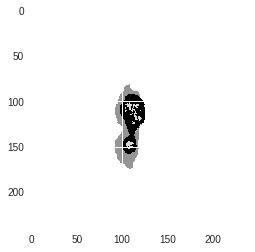

In [35]:
%pylab inline
import matplotlib.pyplot as plt
img = Y_labels[105,:,:]
imgplot = plt.imshow(img)
plt.show()
plt.imsave('/content/drive/My Drive/brat/slice_126_4.png',img,cmap='gray')

In [0]:
print(pred.shape)

(240, 240, 5)


In [36]:
print(pred[115,:,:])

[[1.  0.5 0.5 0.5 0.5]
 [1.  0.5 0.5 0.5 0.5]
 [1.  0.5 0.5 0.5 0.5]
 ...
 [1.  0.5 0.5 0.5 0.5]
 [1.  0.5 0.5 0.5 0.5]
 [1.  0.5 0.5 0.5 0.5]]


In [0]:
pred = np.around(pred)

In [0]:
trial = np.zeros((1,3,3,5))

In [0]:
print(trial)

[[[[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]]]


In [0]:
t = trial[0]

In [0]:
print(t)

[[[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]]]


In [0]:
t[:,:,3]=2

In [0]:
t

array([[[0., 0., 0., 2., 0.],
        [0., 0., 0., 2., 0.],
        [0., 0., 0., 2., 0.]],

       [[0., 0., 0., 2., 0.],
        [0., 0., 0., 2., 0.],
        [0., 0., 0., 2., 0.]],

       [[0., 0., 0., 2., 0.],
        [0., 0., 0., 2., 0.],
        [0., 0., 0., 2., 0.]]])

In [0]:
t[1,2,4] = 5

In [0]:
t

array([[[0., 0., 0., 2., 0.],
        [0., 0., 0., 2., 0.],
        [0., 0., 0., 2., 0.]],

       [[0., 0., 0., 2., 0.],
        [0., 0., 0., 2., 0.],
        [0., 0., 0., 2., 5.]],

       [[0., 0., 0., 2., 0.],
        [0., 0., 0., 2., 0.],
        [0., 0., 0., 2., 0.]]])

In [0]:
tr = t.reshape(( 3 ,3, 5 ) ).argmax( axis=2)

In [0]:
print(tr)

[[3 3 3]
 [3 3 4]
 [3 3 3]]


In [0]:
pr = pred.reshape(( 240 ,  240 , 5 ) ).argmax( axis=2)

In [39]:
pr

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [33]:
pr.shape

(240, 240)

In [40]:
for i in range(240):
  print(pr[i,:])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0